In [1]:
# find important features for each drug

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from toxifate import *
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

path = r"C:\Users\Roman\OneDrive - National University of Ireland, Galway\CellPainting project data\CellProfiler\PerWell\blastsAllByWellProfiler.csv"

perwell = pd.read_csv(path)
perwell.drop(columns=['Unnamed: 0', 'Metadata_Well', 'PlateID', 'Metadata_Concentration (Image)', 'Count'], inplace=True, errors='ignore')
perwell

,Compound,AreaShape_Area (Cells),AreaShape_BoundingBoxMaximum_X (Cells),AreaShape_BoundingBoxMaximum_Y (Cells),AreaShape_BoundingBoxMinimum_X (Cells),AreaShape_BoundingBoxMinimum_Y (Cells),AreaShape_Center_X (Cells),AreaShape_Center_Y (Cells),AreaShape_Compactness (Cells),AreaShape_ConvexArea (Cells),...,Texture_Variance_ER_3_02_256 (FilteredNuclei),Texture_Variance_ER_3_03_256 (FilteredNuclei),Texture_Variance_MITO_3_00_256 (FilteredNuclei),Texture_Variance_MITO_3_01_256 (FilteredNuclei),Texture_Variance_MITO_3_02_256 (FilteredNuclei),Texture_Variance_MITO_3_03_256 (FilteredNuclei),Texture_Variance_RNA_3_00_256 (FilteredNuclei),Texture_Variance_RNA_3_01_256 (FilteredNuclei),Texture_Variance_RNA_3_02_256 (FilteredNuclei),Texture_Variance_RNA_3_03_256 (FilteredNuclei)
0,NCAP,0.484584,1.550984,1.081673,1.458567,0.683639,1.580247,1.136553,0.966164,0.461308,...,-2.572775,-2.561085,-0.017531,0.024250,0.012477,-0.002019,-2.246122,-2.237506,-2.245002,-2.266022
1,NCAP,-0.157705,0.626174,-0.159741,0.724417,-0.195325,0.461126,-0.122063,-0.223185,-0.465019,...,-3.488494,-3.488014,0.548434,0.555000,0.550023,0.551534,-2.841466,-2.849422,-2.832790,-2.854318
2,NCAP,-0.891750,1.022521,-1.474179,0.991381,-1.367278,0.729151,-1.464682,0.806011,-0.607531,...,-2.909896,-2.929025,0.550452,0.545393,0.559650,0.545094,-2.475362,-2.475448,-2.478485,-2.488753
3,NCAP,0.805729,-0.893158,-0.597887,-0.476920,-1.074290,-0.821232,-0.801403,-0.148099,0.372238,...,-3.807343,-3.766243,-0.531848,-0.522584,-0.506716,-0.504337,-3.265408,-3.266243,-3.265458,-3.272163
4,NCAP,-0.845872,0.361942,-0.378814,-0.076474,-0.122078,0.049733,-0.194490,-0.002600,-0.767856,...,-3.000074,-2.979573,0.046328,0.088113,0.065387,0.071783,-2.828945,-2.840122,-2.832672,-2.833497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,DMSO,-1.852676,-0.994764,-0.596370,-0.536708,-0.212692,-0.767186,-0.608554,-0.702304,-1.637105,...,0.670891,0.693776,0.208117,0.217832,0.158043,0.177694,1.386461,1.362714,1.368679,1.375872
3356,DMSO,1.364189,-0.596858,0.775472,-1.038565,1.125411,-0.960687,1.038982,1.491866,1.475083,...,-1.269918,-1.253214,-1.173570,-1.142655,-1.190879,-1.169022,-1.124650,-1.124888,-1.110066,-1.117168
3357,ZIDO,1.498225,-0.845549,-0.939331,-0.938193,-0.510049,-0.950975,-0.743367,0.838250,1.351420,...,-1.470872,-1.439188,-2.232664,-2.199772,-2.131945,-2.141157,-1.336880,-1.341865,-1.356299,-1.328229
3358,ZIDO,-0.217436,0.795811,0.226735,0.968863,-0.807405,0.824993,-0.324558,-0.084436,-0.173758,...,-1.784842,-1.788869,-2.272898,-2.184796,-2.197992,-2.173862,-1.799917,-1.751446,-1.758930,-1.773001


In [2]:
perwell.dropna(axis=1, how='any', inplace=True)

#drop Compound=='DMSO'
perwell = perwell[perwell.Compound != 'DMSO']
perwell = drop_correlated_columns(perwell, 0.8, True)
perwell.shape

Correlation filter : 1415 features dropped (94% of total)


(2784, 91)

In [3]:
X = perwell.drop(columns=['Compound'])
y = perwell['Compound']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, stratify=y, test_size=0.2)

rf = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

y_pred = pd.Series(rf.predict(X_test))
y_pred_proba = rf.predict_proba(X_test)


print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print('ROC AUC score of random forest classifier on test set: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba, multi_class='ovr')))

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

# feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance


Accuracy of random forest classifier on test set: 0.41
ROC AUC score of random forest classifier on test set: 0.91
              precision    recall  f1-score   support

        ATOR       0.50      0.37      0.42        19
        CERI       0.57      0.68      0.62        19
        CISP       1.00      0.05      0.10        19
        CLEV       0.15      0.32      0.20        19
        CLOF       0.15      0.37      0.21        19
        COLC       1.00      0.79      0.88        19
        DAPT       0.35      0.40      0.37        20
        DEXA       0.83      0.94      0.88        16
        DOXO       0.75      0.75      0.75        16
        ETHF       0.30      0.53      0.38        19
        ETOP       0.72      0.68      0.70        19
        ETRE       0.62      0.42      0.50        19
        EZET       1.00      0.12      0.22        16
        FIAL       0.83      0.25      0.38        20
        GEMF       0.00      0.00      0.00        19
         HCQ       0

c:\Users\Roman\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Roman\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Roman\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,feature,importance
0,AreaShape_MedianRadius (Cytoplasm),0.036082
1,RadialDistribution_FracAtD_ER_1of4 (Cells),0.033385
2,RadialDistribution_MeanFrac_ER_1of4 (Cytoplasm),0.031993
3,Neighbors_NumberOfNeighbors_Adjacent (Cells),0.030077
4,AreaShape_Compactness (FilteredNuclei),0.028131
...,...,...
85,AreaShape_BoundingBoxMaximum_X (Cells),0.000405
86,AreaShape_BoundingBoxMinimum_Y (Cells),0.000404
87,AreaShape_Orientation (Cells),0.000354
88,AreaShape_BoundingBoxMaximum_Y (Cells),0.000320


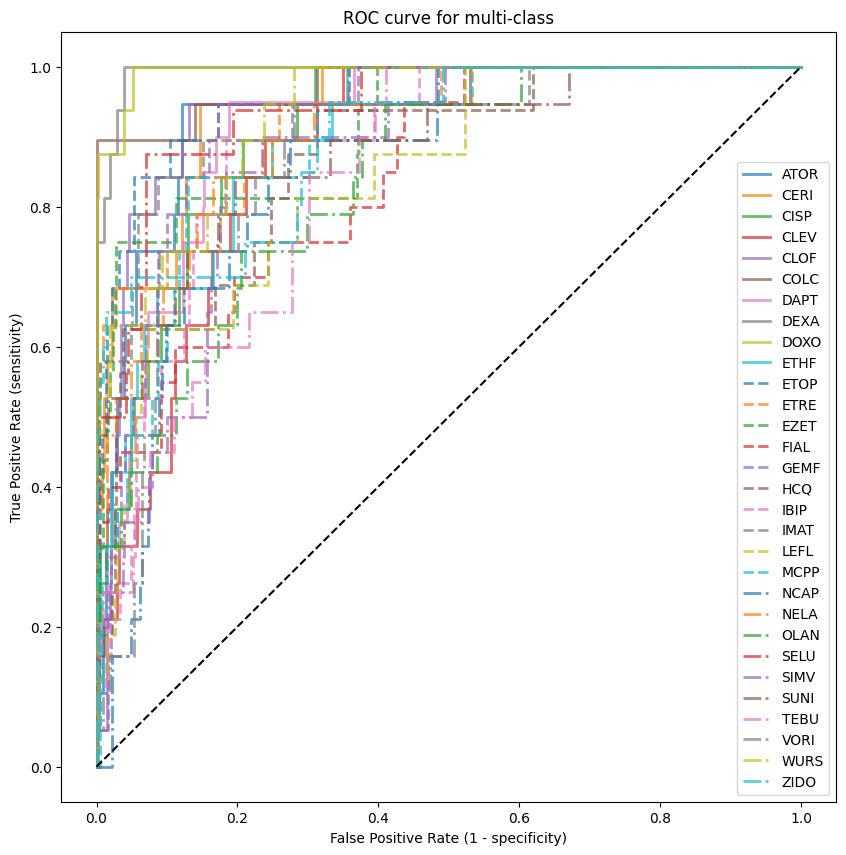

In [4]:
# plot roc curve, and sort by class alphabetical order
y_pred_proba = pd.DataFrame(y_pred_proba, columns=rf.classes_)
y_pred_proba = y_pred_proba.sort_index(axis=1)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba.iloc[:, i], pos_label=rf.classes_[i])
    roc_auc[i] = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

plt.figure(figsize=(10, 10))
for i in range(len(rf.classes_)):
    linestyle = 10*['solid'] + 10*['dashed'] + 10*['dashdot'] + 10*['dotted']
    plt.plot(fpr[i], tpr[i], label='{0}'.format(rf.classes_[i]), linestyle=linestyle[i], linewidth=2, alpha=0.7)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC curve for multi-class')
plt.legend(loc="lower right")
plt.show()




In [5]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

# Visualize the tree
tree_data = tree.export_graphviz(rf.estimators_[0], out_file=None, feature_names=X_train.columns, class_names=rf.classes_, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(tree_data)
graph.render("drug_tree", )



'drug_tree.pdf'